In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [34]:

df=pd.read_csv('/content/preterm.csv')
df

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
0,11055,218320,53231.010,1.860,2,1
1,9118,222820,62367.488,1.580,2,1
2,7925,13481,60503.050,2.067,2,1
3,12451,17474,53628.078,1.731,2,1
4,11152,218320,53317.910,1.857,2,1
5,6029,63781,59177.965,1.701,2,1
6,10052,22310,54431.030,1.790,2,1
7,9101,219830,63467.583,1.490,2,1
8,7929,13192,61503.160,2.067,2,1
9,12452,16473,54678.091,1.701,2,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Count Contraction      58 non-null     int64  
 1   lenght of contraction  58 non-null     int64  
 2   STD                    58 non-null     float64
 3   Entropy                58 non-null     float64
 4   Contraction times      58 non-null     int64  
 5   Pre-term               58 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 2.8 KB


In [11]:
df.isna().sum()

Count Contraction        0
lenght of contraction    0
STD                      0
Entropy                  0
Contraction times        0
Pre-term                 0
dtype: int64

In [19]:
df.describe()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,2503.810345,26621.965517,48564.968190,0.879759,0.637931,0.327586
std,3788.639864,61527.769917,8952.845551,0.528180,0.809988,0.473432
min,222.000000,2308.000000,29205.840000,0.428000,0.000000,0.000000
25%,398.000000,2649.500000,42303.962500,0.490500,0.000000,0.000000
50%,495.000000,3371.500000,49307.490000,0.586000,0.000000,0.000000
75%,1988.750000,12093.750000,54374.865000,1.187500,1.000000,1.000000
max,12452.000000,228321.000000,63467.583000,2.067000,2.000000,1.000000


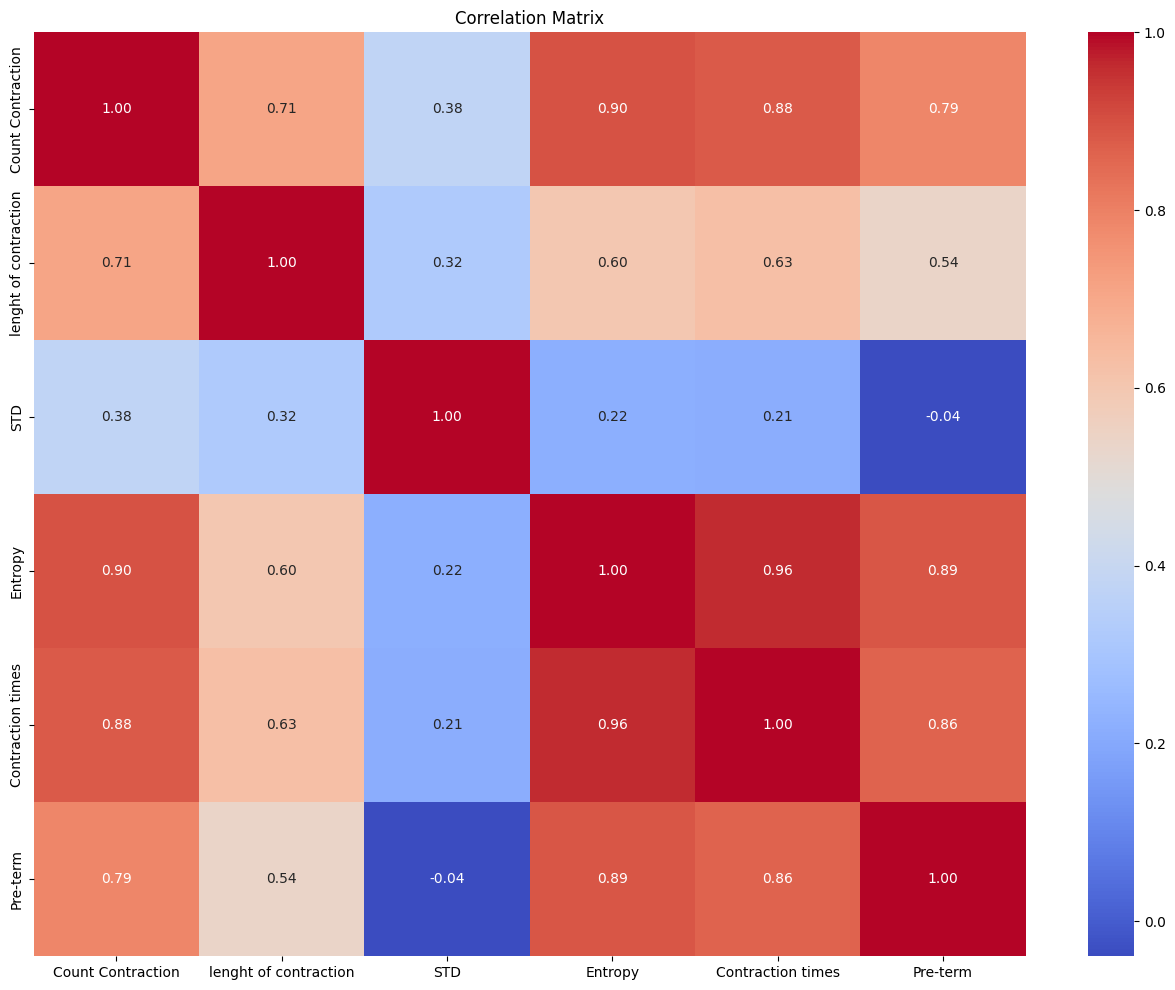

In [14]:
# Display a correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


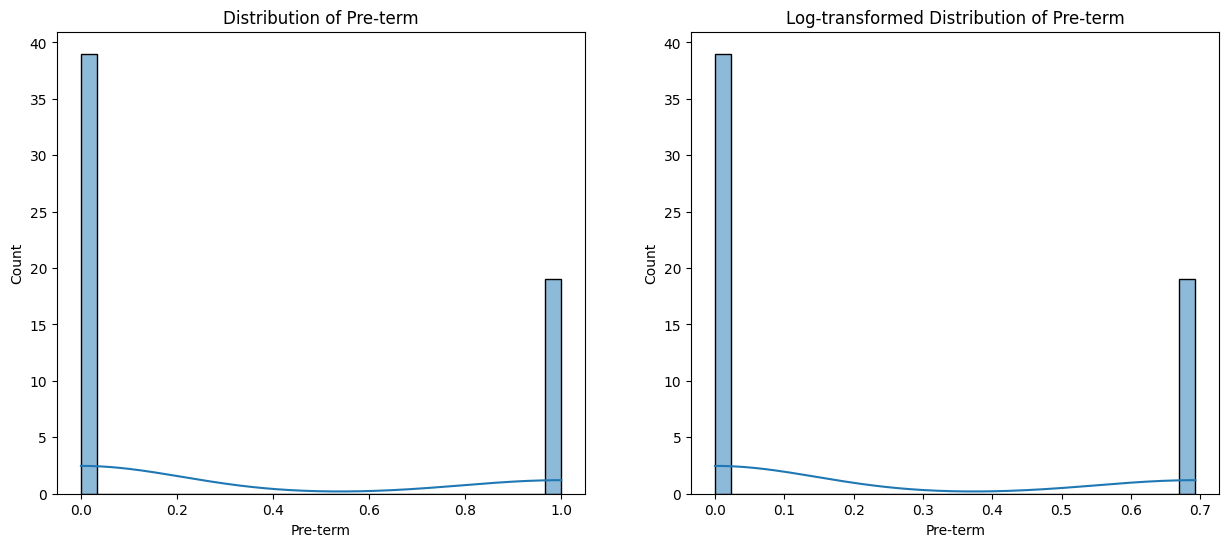

In [15]:
plt.figure(figsize=(15, 6))

# Distribution of Pre-term
plt.subplot(1, 2, 1)
sns.histplot(df['Pre-term'], bins=30, kde=True)
plt.title('Distribution of Pre-term')

# Log-transformed distribution of Pre-term
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['Pre-term']), bins=30, kde=True)  # Using log1p to handle zero values
plt.title('Log-transformed Distribution of Pre-term')

plt.show()


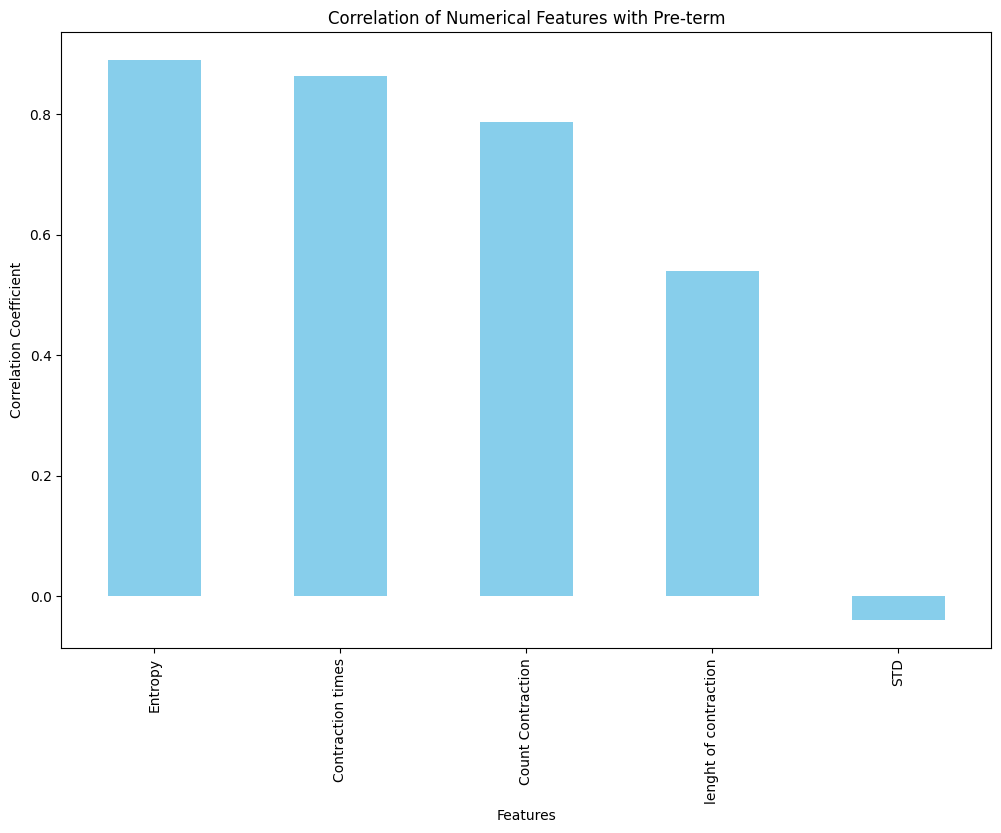

In [18]:
# Calculate correlation values
correlation_values = correlation_matrix['Pre-term'].sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 8))
correlation_values.drop('Pre-term').plot(kind='bar', color='skyblue')
plt.title('Correlation of Numerical Features with Pre-term')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

In [36]:
df.columns

Index(['Count Contraction', 'lenght of contraction', 'STD', 'Entropy',
       'Contraction times', 'Pre-term'],
      dtype='object')

In [37]:
import plotly.express as px
import pandas as pd

# Assuming your dataset is in a DataFrame named df
# If not, you can create a DataFrame using pd.DataFrame()

# Example DataFrame creation
data = {
    'Count Contraction': df['Count Contraction'],
    'lenght of contraction':df['lenght of contraction'],
    'STD': df['STD'],
    'Entropy':df['Entropy'],
    'Contraction times':df['Contraction times'],
    'Pre-term':df['Pre-term']}


df = pd.DataFrame(data)

fig = px.scatter(df, x='Count Contraction', y='lenght of contraction', color='Pre-term', size='Contraction times',
                 labels={'Count Contraction': 'Count Contraction', 'lenght of contraction': 'Length of Contraction'},
                 title='Scatter Plot of Contraction Data')
# Show the plot
fig.show()


In [39]:
# Pair Plot
fig_pair = px.scatter_matrix(df, dimensions=['Count Contraction', 'lenght of contraction', 'STD', 'Entropy', 'Contraction times'],
                              color='Pre-term', title='Pair Plot of Contraction Data')
fig_pair.show()

In [40]:
# Box Plot
fig_box = px.box(df, x='Pre-term', y='Count Contraction', title='Box Plot of Count Contraction by Pre-term')
fig_box.show()


In [41]:
# Histogram
fig_hist = px.histogram(df, x='Contraction times', color='Pre-term', title='Histogram of Contraction Times by Pre-term')
fig_hist.show()

In [42]:
# Scatter 3D
fig_scatter_3d = px.scatter_3d(df, x='lenght of contraction', y='Contraction times', z='STD', color='Pre-term',
                                title='3D Scatter Plot of Contraction Data')
fig_scatter_3d.show()

Model_building

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
X = df.drop('Pre-term', axis=1)  # Features
y = df['Pre-term']  # Target variable

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Initialize the logistic regression model
model = LogisticRegression()

In [46]:
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
# Evaluate the model
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [58]:

print(f'Accuracy: {accuracy}')


Accuracy: 1.0


In [59]:
print('Classification Report:\n', classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



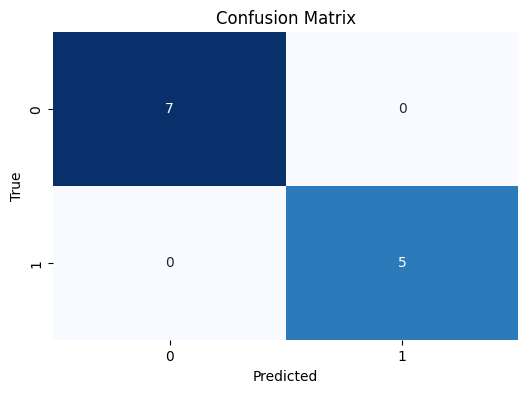

In [57]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [60]:
import pickle

with open('preterm.pkl', 'wb') as file:
    pickle.dump(model, file)